##**Ejercicio de Regresión Lineal Múltiple**

In [1]:
# Preparamos en entorno, importamos librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [4]:
# Cargamos el dataset

df = pd.read_csv('/content/dataset_regresion_multiple.csv', delimiter= ";")
df.head()


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
0,58,7,81,1,21150,12,73.83
1,48,2,55,1,94740,22,82.26
2,34,2,81,3,86617,24,90.47
3,62,0,53,6,36896,34,93.49
4,27,4,60,7,66175,29,65.74


In [5]:
# Exploración inicial

# Generamos estadísticas descriptivas para entender la distribución de cada variable.
df.describe()


,edad,horas_ejercicio,peso,estres,ingresos,horas_tv,presion_arterial
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,41.600000,4.370000,73.28000,4.700000,59778.350000,19.760000,85.395000
std,13.311346,3.013957,14.29917,2.512595,23603.253158,11.136545,20.531869
min,20.000000,0.000000,50.00000,1.000000,20412.000000,0.000000,38.140000
25%,30.000000,2.000000,60.00000,3.000000,38042.000000,11.000000,72.045000
50%,41.500000,4.000000,73.00000,5.000000,58634.500000,18.500000,84.415000
75%,53.250000,7.000000,84.00000,7.000000,80475.250000,28.250000,98.465000
max,64.000000,9.000000,99.00000,9.000000,99605.000000,39.000000,137.270000


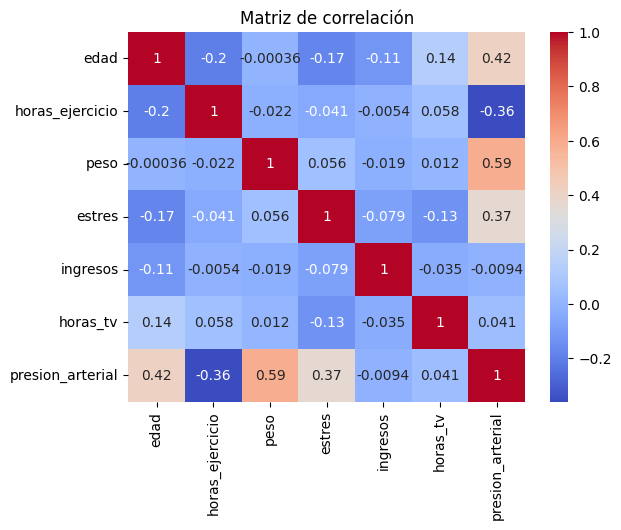

In [7]:
# Visualizamos la matriz de correlación para identificar qué variables están más relacionadas con la presión arterial.

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


Observamos que las variables con correlación mas destacadas con la presion arterial son:

**peso, correlación 0.59** (una relación fuerte, a mayor peso, mayor presión arterial)

**edad, correlación 0.42** (la presión arterial tiende a subir con la edad)

**estres, correlación 0.37** (con una relación moderada, pero indica que mas estres, mas preción arterial)

**horas de ejercicio, -0.36** (con una relación inversa, cuanto mas ejercicio, menor la presión arterial)

##Seleccionamos las variables para el modelo en base a su correlación con la presión arterial.

Las variables con mayor correlación positiva fueron: peso, edad y estrés.



In [8]:
# Construímos un Modelo de regresión lineal múltiple (todas las variables predictoras)
# Separamos las variables independientes (X) de la variable objetivo (y), que es la presión arterial.
X = df.drop('presion_arterial', axis=1)
y = df['presion_arterial']

# Entrenamos el modelo con todos los datos disponibles usando LinearRegression de sklearn.
model = LinearRegression()
model.fit(X, y)

# Usamos el modelo para predecir la presión arterial y evaluamos su rendimiento.
y_pred = model.predict(X)

# Métricas (R²: coeficiente de determinación; RMSE: error cuadrático medio; MAE: error absoluto medio )
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f'R²: {r2:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')


R²: 0.76, RMSE: 10.04, MAE: 7.91


Interpretación de los resultados:

El R² de 0.76 sugiere que el modelo capta bastante bien la relación entre las variables predictoras y la presión arterial.

Los errores (RMSE y MAE) son aceptables para un modelo lineal aplicado a datos humanos, donde siempre hay cierta variabilidad.

Como se usaron todas las variables, es posible que algunas estén aportando poco o incluso ruido.

Vemos algunos gráficos:

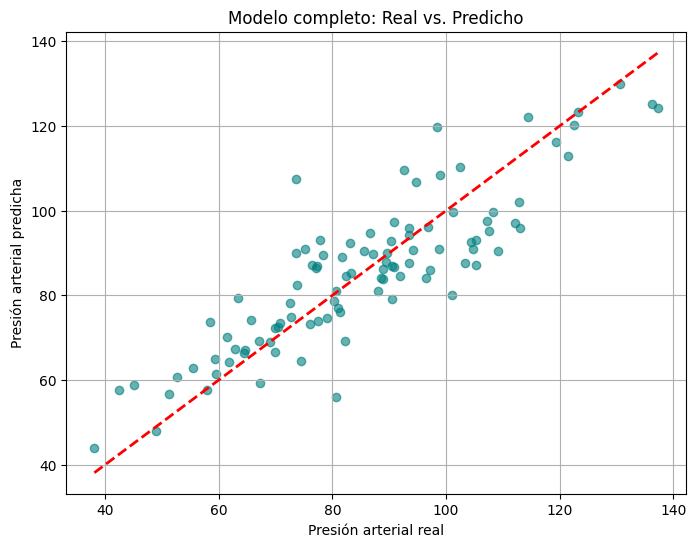

In [14]:
# Gráfico de dispersión: valores reales vs. predichos
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Presión arterial real')
plt.ylabel('Presión arterial predicha')
plt.title('Modelo completo: Real vs. Predicho')
plt.grid(True)
plt.show()


Aunque hay cierta dispersión, especialmente en los extremos, el modelo logra una buena aproximación general.

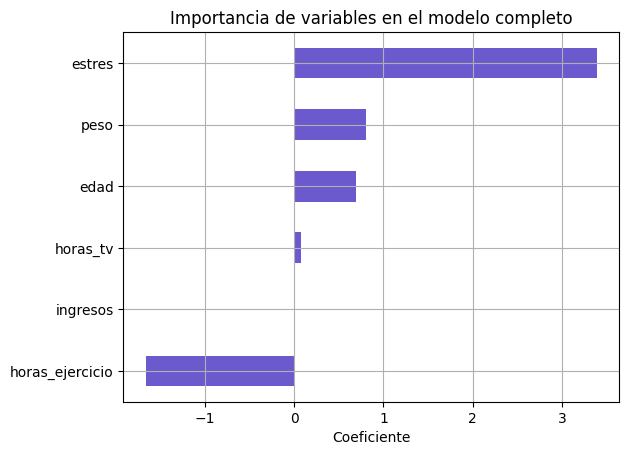

In [15]:
# Importancia de coeficientes (peso de cada variable)
coef = pd.Series(model.coef_, index=X.columns)
coef.sort_values().plot(kind='barh', color='slateblue')
plt.title('Importancia de variables en el modelo completo')
plt.xlabel('Coeficiente')
plt.grid(True)
plt.show()


El modelo identifica al estrés como el principal factor de riesgo, mientras que el ejercicio aparece como un factor de protección. Las demás variables aportan información adicional pero con menor peso.

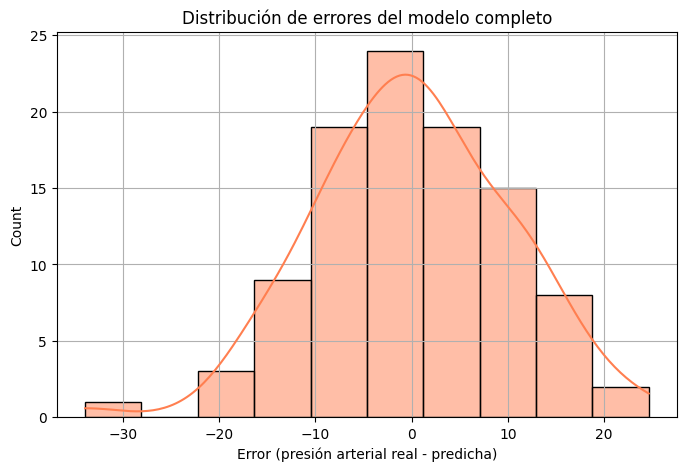

In [16]:
# Histograma de errores (residuos del modelo completo)
residuos = y - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True, color='coral')
plt.title('Distribución de errores del modelo completo')
plt.xlabel('Error (presión arterial real - predicha)')
plt.grid(True)
plt.show()


La forma del histograma respalda la validez del modelo desde el punto de vista estadístico. Una distribución de errores aproximadamente normal sugiere que no hay sesgos sistemáticos y que el modelo se comporta de forma estable.

##Probamos con un Modelo simplificado para analizar y comparar si se pierde mucho poder explicativo al reducir variables

In [10]:
# Modelo simplificado (variables más relevantes, edad, peso, estrés y horas de ejercicio)
X_simplified = df[['edad', 'peso', 'estres', 'horas_ejercicio']]
model_simplified = LinearRegression()
model_simplified.fit(X_simplified, y)

y_pred_simplified = model_simplified.predict(X_simplified)

r2_s = r2_score(y, y_pred_simplified)
rmse_s = np.sqrt(mean_squared_error(y, y_pred_simplified))
mae_s = mean_absolute_error(y, y_pred_simplified)

print(f'Modelo simplificado → R²: {r2_s:.2f}, RMSE: {rmse_s:.2f}, MAE: {mae_s:.2f}')


Modelo simplificado → R²: 0.75, RMSE: 10.22, MAE: 8.12


**Indicadores de desempeño:**

R² = 0.75: El modelo explica el 75% de la variabilidad en la presión arterial. Muy cercano al modelo completo (0.76), lo que indica que la simplificación no compromete significativamente la capacidad explicativa.

RMSE = 10.22: El error cuadrático medio se mantiene en un rango aceptable, con solo una leve pérdida de precisión respecto al modelo completo (10.04).

MAE = 8.12: El error absoluto medio también se mantiene estable, lo que refuerza la solidez del modelo simplificado.

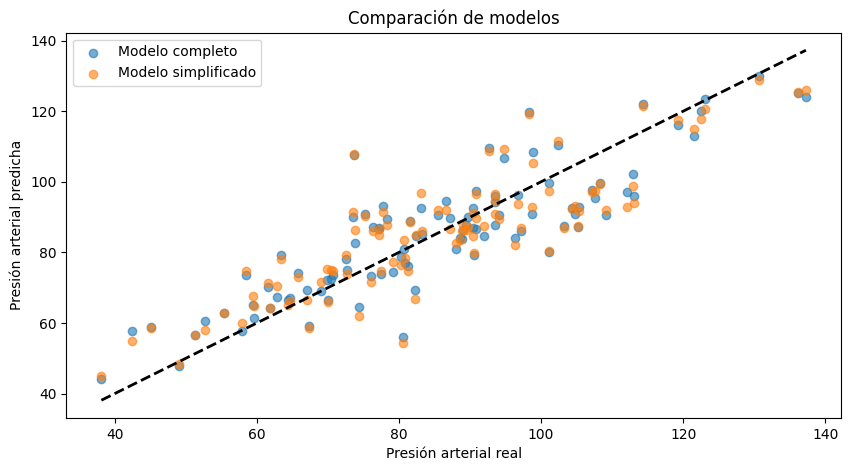

In [11]:
# Visualización de resultados

plt.figure(figsize=(10,5))
plt.scatter(y, y_pred, label='Modelo completo', alpha=0.6)
plt.scatter(y, y_pred_simplified, label='Modelo simplificado', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Presión arterial real')
plt.ylabel('Presión arterial predicha')
plt.legend()
plt.title('Comparación de modelos')
plt.show()


**Reflexión final:**
 Ambos modelos capturan bien la relación entre las variables y la presión arterial, pero el modelo completo tiene una leve ventaja en precisión. Sin embargo, la diferencia es mínima, lo que refuerza la utilidad del modelo simplificado cuando se busca eficiencia sin perder demasiado rendimiento.